In [1]:
# importing all the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
data=pd.read_csv("H2HBABBA1213.csv")

In [3]:
data.shape

(50000, 19)

In [4]:
data.head(10)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200707822,PUBLI foundation,NaN,2020,1930751582,05-04-2020,20200405,20200405,20200420,USD,RV,1,NaN,162682.15,20200405,NAA8,1.930752e+09,1
1,U001,200772670,ASSOCIAT corporation,06-08-2019 00:00,2019,1929643513,20-07-2019,20190720,20190720,20190804,USD,RV,1,NaN,46457.01,20190720,NAU5,1.929644e+09,0
2,U001,200519201,KROGE associates,17-12-2019 00:00,2019,1930131981,10-11-2019,20191108,20191110,20191125,USD,RV,1,NaN,118016.26,20191110,NAA8,1.930132e+09,0
3,U001,200726979,BJ'S in,01-05-2019 00:00,2019,1929201797,16-04-2019,20190424,20190416,20190501,USD,RV,1,NaN,552.82,20190416,NAA8,1.929202e+09,0
4,U001,200762301,C&S WH in,21-01-2020 00:00,2020,1930352828,03-01-2020,20200104,20200103,20200118,USD,RV,1,NaN,93682.82,20200103,NAC6,1.930353e+09,0
5,U001,200762301,C&S WH llc,06-09-2019 00:00,2019,1929774043,22-08-2019,20190822,20190822,20190906,USD,RV,1,NaN,20435.64,20190822,NAC6,1.929774e+09,0
6,U001,200762301,C&S WH associates,03-02-2020 00:00,2020,1930409890,17-01-2020,20200117,20200117,20200201,USD,RV,1,NaN,77072.21,20200117,NAC6,1.930410e+09,0
7,U001,200799367,MCL trust,13-03-2020 00:00,2020,1930576230,26-02-2020,20200226,20200226,20200312,USD,RV,1,NaN,18151.17,20200226,NAA8,1.930576e+09,0
8,U001,200769623,WAL-MAR systems,11-02-2019 00:00,2019,1928676885,25-01-2019,20190124,20190125,20190209,USD,RV,1,NaN,65088.68,20190125,NAH4,1.928677e+09,0
9,U001,CCU013,KRAFT F trust,30-08-2019 00:00,2019,1929632959,21-07-2019,20190717,20190721,20190721,USD,RV,1,NaN,3405.60,20190721,NAX2,1.929633e+09,0


In [5]:
data.tail(10)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
49990,U001,200790710,F,19-12-2019 00:00,2019,1930205143,03-12-2019,20191130,20191203,20191218,USD,RV,1,NaN,36839.62,20191203,NAA8,1.930205e+09,0
49991,U001,200726979,BJ'S trust,15-07-2019 00:00,2019,1929556006,29-06-2019,20190628,20190629,20190714,USD,RV,1,NaN,242.56,20190629,NAA8,1.929556e+09,0
49992,U001,200763152,PERFOR foundation,11-03-2019 00:00,2019,1928816110,19-02-2019,20190218,20190219,20190306,USD,RV,1,NaN,38799.45,20190219,NAA8,1.928816e+09,0
49993,U001,200761734,H E BUT us,07-10-2019 00:00,2019,1929890494,21-09-2019,20190918,20190921,20191006,USD,RV,1,NaN,43601.12,20190921,NAA8,1.929890e+09,0
49994,U001,200707822,PUBLI co,23-05-2019 00:00,2019,1929279004,08-05-2019,20190508,20190508,20190523,USD,RV,1,NaN,87898.51,20190508,NAA8,1.929279e+09,0
49995,U001,200769623,WAL-MAR foundation,01-07-2019 00:00,2019,1929516609,20-06-2019,20190619,20190620,20190705,USD,RV,1,NaN,29115.61,20190620,NAH4,1.929517e+09,0
49996,U001,200148860,DOLLA co,25-02-2019 00:00,2019,1928760878,09-02-2019,20190207,20190209,20190224,USD,RV,1,NaN,17920.32,20190209,NAA8,1.928761e+09,0
49997,U001,200762301,C&S WH corporation,20-09-2019 00:00,2019,1929827076,06-09-2019,20190904,20190906,20190921,USD,RV,1,NaN,8065.97,20190906,NAC6,1.929827e+09,0
49998,U001,200749091,DICA trust,04-10-2019 00:00,2019,1929877984,17-09-2019,20190916,20190917,20191007,USD,RV,1,NaN,42434.49,20190917,NAD1,1.929878e+09,0
49999,U001,200739006,AL foundation,NaN,2020,1930739502,04-04-2020,20200403,20200404,20200419,USD,RV,1,NaN,21300.00,20200404,NAA8,1.930740e+09,1


In [6]:
#changing all the date in date format
data=pd.read_csv("H2HBABBA1213.csv",parse_dates=['clear_date','document_create_date','document_create_date.1',
                                                       'due_in_date','baseline_create_date','posting_date'])

In [7]:
# dropping the constant columns
data.drop(columns=['area_business','document_create_date.1','document type','posting_id'],inplace=True)

In [8]:
# splitting the dataset of null of clear_date to dataframe
main_train=data[data.clear_date.isnull()==False]
main_test=data[data.clear_date.isnull()==True]

In [9]:
main_train.shape,main_test.shape

((40000, 15), (10000, 15))

In [10]:
main_train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
1,U001,200772670,ASSOCIAT corporation,2019-06-08,2019,1929643513,2019-07-20,2019-07-20,2019-08-04,USD,46457.01,2019-07-20,NAU5,1.929644e+09,0
2,U001,200519201,KROGE associates,2019-12-17,2019,1930131981,2019-10-11,2019-11-08,2019-11-25,USD,118016.26,2019-11-10,NAA8,1.930132e+09,0
3,U001,200726979,BJ'S in,2019-01-05,2019,1929201797,2019-04-16,2019-04-24,2019-05-01,USD,552.82,2019-04-16,NAA8,1.929202e+09,0
4,U001,200762301,C&S WH in,2020-01-21,2020,1930352828,2020-03-01,2020-01-04,2020-01-18,USD,93682.82,2020-01-03,NAC6,1.930353e+09,0
5,U001,200762301,C&S WH llc,2019-06-09,2019,1929774043,2019-08-22,2019-08-22,2019-09-06,USD,20435.64,2019-08-22,NAC6,1.929774e+09,0


In [11]:
main_train.isna().sum()

business_code           0
cust_number             0
name_customer           0
clear_date              0
buisness_year           0
doc_id                  0
posting_date            0
document_create_date    0
due_in_date             0
invoice_currency        0
total_open_amount       0
baseline_create_date    0
cust_payment_terms      0
invoice_id              7
isOpen                  0
dtype: int64

In [12]:
#checking the null values of invoice_id
main_train[main_train.invoice_id.isnull()]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
3489,CA02,140104429,COSTCO,2019-05-14,2019,9500000011,2019-03-29,2019-03-29,2019-03-21,CAD,5353.20,2019-03-11,CA10,NaN,0
16542,CA02,140104409,LOB,2019-12-27,2019,9500000068,2019-03-29,2019-03-29,2018-12-22,CAD,628.60,2018-12-12,CA10,NaN,0
19896,CA02,140104429,COSTCO us,2019-05-22,2019,9500000029,2019-03-29,2019-03-29,2019-04-01,CAD,5353.20,2019-03-22,CA10,NaN,0
19975,CA02,140104409,LOB systems,2019-08-05,2019,9500000052,2019-03-29,2019-03-29,2019-02-17,CAD,16857.72,2019-02-07,CA10,NaN,0
23946,CA02,140104409,LOB co,2019-12-27,2019,9500000073,2019-03-29,2019-03-29,2019-03-10,CAD,173.44,2019-02-28,CA10,NaN,0
28992,CA02,140104429,COSTCO us,2019-07-16,2019,9500000015,2019-03-29,2019-03-29,2019-03-09,CAD,42393.60,2019-02-27,CA10,NaN,0
29675,CA02,140106054,TREE,2019-05-31,2019,9500000127,2019-03-29,2019-03-29,2019-03-23,CAD,6739.20,2019-03-13,CA10,NaN,0


In [13]:
#dropping the null values of invoice_id
main_train=main_train[main_train.invoice_id.isnull()==False]

In [14]:
main_train.dtypes

business_code                   object
cust_number                     object
name_customer                   object
clear_date              datetime64[ns]
buisness_year                    int64
doc_id                           int64
posting_date            datetime64[ns]
document_create_date    datetime64[ns]
due_in_date             datetime64[ns]
invoice_currency                object
total_open_amount              float64
baseline_create_date    datetime64[ns]
cust_payment_terms              object
invoice_id                     float64
isOpen                           int64
dtype: object

In [15]:
#checking the unique values
main_train.nunique()

business_code               5
cust_number              1020
name_customer            3843
clear_date                393
buisness_year               2
doc_id                  39157
posting_date              423
document_create_date      428
due_in_date               498
invoice_currency            2
total_open_amount       35647
baseline_create_date      435
cust_payment_terms         68
invoice_id              39157
isOpen                      1
dtype: int64

In [16]:
main_train.drop(columns=['isOpen'],inplace=True,axis=1)

In [17]:
main_train.loc[1000:,'cust_payment_terms'].value_counts()

NAA8    15691
NAH4    10370
CA10     2954
NAC6     1312
NAM4     1107
        ...  
CA60        1
NAV9        1
90M7        1
NAUN        1
NAUY        1
Name: cust_payment_terms, Length: 67, dtype: int64

In [18]:
main_train['baseline_create_date'].min(),main_train['baseline_create_date'].max()

(Timestamp('2018-12-12 00:00:00'), Timestamp('2020-04-07 00:00:00'))

In [19]:
# preparing the target column
main_train['delay']=main_train['clear_date']-main_train['due_in_date']

In [20]:
main_train.head(10)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay
1,U001,200772670,ASSOCIAT corporation,2019-06-08,2019,1929643513,2019-07-20,2019-07-20,2019-08-04,USD,46457.01,2019-07-20,NAU5,1.929644e+09,-57 days
2,U001,200519201,KROGE associates,2019-12-17,2019,1930131981,2019-10-11,2019-11-08,2019-11-25,USD,118016.26,2019-11-10,NAA8,1.930132e+09,22 days
3,U001,200726979,BJ'S in,2019-01-05,2019,1929201797,2019-04-16,2019-04-24,2019-05-01,USD,552.82,2019-04-16,NAA8,1.929202e+09,-116 days
4,U001,200762301,C&S WH in,2020-01-21,2020,1930352828,2020-03-01,2020-01-04,2020-01-18,USD,93682.82,2020-01-03,NAC6,1.930353e+09,3 days
5,U001,200762301,C&S WH llc,2019-06-09,2019,1929774043,2019-08-22,2019-08-22,2019-09-06,USD,20435.64,2019-08-22,NAC6,1.929774e+09,-89 days
6,U001,200762301,C&S WH associates,2020-03-02,2020,1930409890,2020-01-17,2020-01-17,2020-02-01,USD,77072.21,2020-01-17,NAC6,1.930410e+09,30 days
7,U001,200799367,MCL trust,2020-03-13,2020,1930576230,2020-02-26,2020-02-26,2020-03-12,USD,18151.17,2020-02-26,NAA8,1.930576e+09,1 days
8,U001,200769623,WAL-MAR systems,2019-11-02,2019,1928676885,2019-01-25,2019-01-24,2019-02-09,USD,65088.68,2019-01-25,NAH4,1.928677e+09,266 days
9,U001,CCU013,KRAFT F trust,2019-08-30,2019,1929632959,2019-07-21,2019-07-17,2019-07-21,USD,3405.60,2019-07-21,NAX2,1.929633e+09,40 days
10,CA02,140104429,COSTCO trust,2019-02-12,2019,2960593702,2019-11-15,2019-11-15,2019-11-28,CAD,9653.81,2019-11-18,CA10,2.960594e+09,-289 days


In [21]:
main_train.sort_values(by=['baseline_create_date'],inplace=True)

In [22]:
main_train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay
40737,CA02,140120967,VEG PR trust,2019-04-22,2019,2960521729,2019-11-01,2019-01-11,2018-12-22,CAD,250.00,2018-12-12,CA10,2.960522e+09,121 days
369,CA02,140104429,COSTCO,2019-09-01,2019,2960520784,2019-07-01,2019-01-07,2018-12-25,CAD,60590.26,2018-12-15,CA10,2.960521e+09,250 days
32156,U001,200754118,ARMY in,2019-04-02,2019,1928632837,2019-01-16,2019-01-16,2018-12-31,USD,37.07,2018-12-16,NAM3,1.928633e+09,92 days
14076,CA02,140104429,COSTCO foundation,2019-02-20,2019,2960522240,2019-11-01,2019-01-11,2019-01-06,CAD,22661.76,2018-12-27,CA10,2.960522e+09,45 days
25183,U001,200769623,WAL-MAR corporation,2019-09-01,2019,1928539252,2018-12-30,2018-12-29,2019-01-14,USD,705.86,2018-12-30,NAH4,1.928539e+09,230 days


In [23]:
main_train['delay']=(main_train['delay']).dt.days

# EDA

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delay', ylabel='Density'>

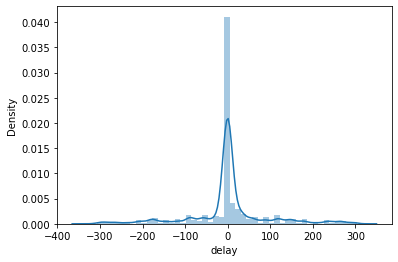

In [24]:
#checking the outliers
sns.distplot(main_train.delay)

In [25]:
#process to remove outliers for normal distribution
print("Highest allowed",main_train['delay'].mean() + 3*main_train['delay'].std())
print("Lowest allowed",main_train['delay'].mean() - 3*main_train['delay'].std())

Highest allowed 271.93912922788724
Lowest allowed -269.2165527770083


In [26]:
main_train[(main_train['delay'] > 271.93) | (main_train['delay'] < -269.21)]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay
16189,U001,200769623,WAL-MAR us,2019-11-01,2019,1928544227,2018-12-31,2018-12-31,2019-01-15,USD,13065.20,2018-12-31,NAH4,1.928544e+09,290
2513,U001,200770567,LABAT llc,2019-11-01,2019,1928536121,2018-12-31,2018-12-29,2019-01-15,USD,37141.74,2018-12-31,NAA8,1.928536e+09,290
42317,U001,200769623,WAL-MAR,2019-11-01,2019,1928542854,2018-12-31,2018-12-30,2019-01-15,USD,41435.38,2018-12-31,NAH4,1.928543e+09,290
44327,U001,200769623,WAL-MAR associates,2019-11-01,2019,1928540698,2018-12-31,2018-12-29,2019-01-15,USD,14847.09,2018-12-31,NAH4,1.928541e+09,290
36320,U001,200769623,WAL-MAR co,2019-11-01,2019,1928543901,2018-12-31,2018-12-30,2019-01-15,USD,46926.27,2018-12-31,NAH4,1.928544e+09,290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6135,U001,200769623,WAL-MAR corporation,2020-12-02,2020,1930461592,2020-02-02,2020-02-01,2020-02-17,USD,31071.61,2020-02-02,NAH4,1.930462e+09,289
15204,U001,200769623,WAL-MAR co,2020-12-02,2020,1930468664,2020-02-02,2020-02-02,2020-02-17,USD,22565.01,2020-02-02,NAH4,1.930469e+09,289
22288,CA02,140104240,FEDER us,2020-12-02,2020,2960610655,2020-01-29,2020-01-29,2020-02-17,CAD,128897.90,2020-02-07,CA10,2.960611e+09,289
26474,CA02,140104240,FEDER associates,2020-12-02,2020,2960611306,2020-01-29,2020-01-29,2020-02-17,CAD,122396.58,2020-02-07,CA10,2.960611e+09,289


In [27]:
main_train_1 = main_train[(main_train['delay'] < 271.93) & (main_train['delay'] > -269.21)]
main_train_1

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay
40737,CA02,140120967,VEG PR trust,2019-04-22,2019,2960521729,2019-11-01,2019-01-11,2018-12-22,CAD,250.00,2018-12-12,CA10,2.960522e+09,121
369,CA02,140104429,COSTCO,2019-09-01,2019,2960520784,2019-07-01,2019-01-07,2018-12-25,CAD,60590.26,2018-12-15,CA10,2.960521e+09,250
32156,U001,200754118,ARMY in,2019-04-02,2019,1928632837,2019-01-16,2019-01-16,2018-12-31,USD,37.07,2018-12-16,NAM3,1.928633e+09,92
14076,CA02,140104429,COSTCO foundation,2019-02-20,2019,2960522240,2019-11-01,2019-01-11,2019-01-06,CAD,22661.76,2018-12-27,CA10,2.960522e+09,45
25183,U001,200769623,WAL-MAR corporation,2019-09-01,2019,1928539252,2018-12-30,2018-12-29,2019-01-14,USD,705.86,2018-12-30,NAH4,1.928539e+09,230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44578,CA02,140104409,LOB foundation,2020-03-16,2020,2960616367,2020-02-25,2020-02-25,2020-03-15,CAD,217752.00,2020-03-05,CA10,2.960616e+09,1
48060,CA02,140105686,SYSC foundation,2020-03-26,2020,2960616826,2020-02-25,2020-02-25,2020-03-15,CAD,12478.99,2020-03-05,CA10,2.960617e+09,11
23597,CA02,140104409,LOB,2020-03-16,2020,2960616397,2020-02-26,2020-02-26,2020-03-16,CAD,92841.74,2020-03-06,CA10,2.960616e+09,0
1330,CA02,CCU013,KRAFT F co,2020-03-27,2020,2960613647,2020-12-02,2020-02-12,2020-03-24,CAD,24172.44,2020-03-24,NAX2,2.960614e+09,3


In [28]:
upper_limit = main_train['delay'].mean() + 3*main_train['delay'].std()
lower_limit = main_train['delay'].mean() - 3*main_train['delay'].std()

In [29]:
main_train['delay'] = np.where(
    main_train['delay']>upper_limit,
    upper_limit,
    np.where(
        main_train['delay']<lower_limit,
        lower_limit,
        main_train['delay']
    )
)

In [30]:
main_train['delay'].describe()

count    39993.000000
mean         1.472307
std         88.887238
min       -269.216553
25%         -5.000000
50%          0.000000
75%          6.000000
max        271.939129
Name: delay, dtype: float64

In [31]:
# set the target column in other dataframe
x = main_train.drop('delay',axis=1)

In [32]:
y = main_train['delay']

In [33]:
main_train.drop('delay',inplace=True,axis=1)

In [34]:
x.shape,y.shape

((39993, 14), (39993,))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_open_amount', ylabel='Density'>

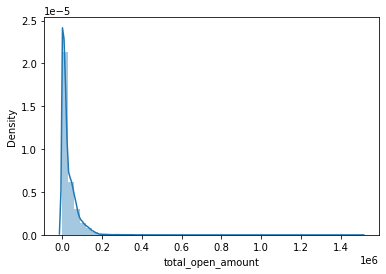

In [35]:
sns.distplot(x.total_open_amount)

In [36]:
#process to remove outliers for skewed distribution
Q1 = x['total_open_amount'].quantile(0.25)
Q3 = x['total_open_amount'].quantile(0.75)
IQR = Q3-Q1

In [37]:
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

In [38]:
x[x['total_open_amount'] > upper_limit]
x[x['total_open_amount'] < lower_limit]
x.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
40737,CA02,140120967,VEG PR trust,2019-04-22,2019,2960521729,2019-11-01,2019-01-11,2018-12-22,CAD,250.00,2018-12-12,CA10,2.960522e+09
369,CA02,140104429,COSTCO,2019-09-01,2019,2960520784,2019-07-01,2019-01-07,2018-12-25,CAD,60590.26,2018-12-15,CA10,2.960521e+09
32156,U001,200754118,ARMY in,2019-04-02,2019,1928632837,2019-01-16,2019-01-16,2018-12-31,USD,37.07,2018-12-16,NAM3,1.928633e+09
14076,CA02,140104429,COSTCO foundation,2019-02-20,2019,2960522240,2019-11-01,2019-01-11,2019-01-06,CAD,22661.76,2018-12-27,CA10,2.960522e+09
25183,U001,200769623,WAL-MAR corporation,2019-09-01,2019,1928539252,2018-12-30,2018-12-29,2019-01-14,USD,705.86,2018-12-30,NAH4,1.928539e+09


In [39]:
x_data = x[x['total_open_amount'] < upper_limit]
x_data.shape

(37888, 14)

In [40]:
main_train_cap = x.copy()
main_train_cap['total_open_amount'] = np.where(
    main_train_cap['total_open_amount'] > upper_limit,
    upper_limit,
    np.where(
        main_train_cap['total_open_amount'] < lower_limit,
        lower_limit,
        main_train_cap['total_open_amount']
    )
)

In [41]:
main_train1=main_train.drop(['clear_date'],axis=1)

In [42]:
x_data=main_train['clear_date']

In [43]:
main_train.drop(['clear_date'],inplace=True,axis=1)

# Train,Test and Validation

In [44]:
#splitting the data into train,test,validation set
x_train=main_train[main_train['baseline_create_date'] <= '2019-10-30'].reset_index(drop=True)
x_temp=main_train[main_train['baseline_create_date']>'2019-11-01'].reset_index(drop=True)

x_val=x_temp[x_temp['baseline_create_date']<='2020-01-07'].reset_index(drop=True)
x_test=x_temp[x_temp['baseline_create_date']>'2020-01-07'].reset_index(drop=True)

In [45]:
x_train.shape,x_test.shape,x_val.shape

((30157, 13), (4461, 13), (5106, 13))

In [46]:
#splitting the target into train,test,validation set
y_train = y[:30157].reset_index(drop=True)
y_val = y[30158:35264].reset_index(drop=True)
y_test = y[35532:].reset_index(drop=True)

In [47]:
y_train.shape,y_test.shape,y_val.shape

((30157,), (4461,), (5106,))

In [48]:
#function to remove column on feature engg
def remove_column(col ,traindf = x_train,valdf = x_val,testdf = x_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

# Feature Engg

In [49]:
# changing the date into day,month and year
x_train['day_of_baseline'] = x_train['baseline_create_date'].dt.day
x_train['month_of_baseline'] = x_train['baseline_create_date'].dt.month
x_train['year_of_baseline'] = x_train['baseline_create_date'].dt.year

x_val['day_of_baseline'] = x_val['baseline_create_date'].dt.day
x_val['month_of_baseline'] = x_val['baseline_create_date'].dt.month
x_val['year_of_baseline'] = x_val['baseline_create_date'].dt.year


x_test['day_of_baseline'] = x_test['baseline_create_date'].dt.day
x_test['month_of_baseline'] = x_test['baseline_create_date'].dt.month
x_test['year_of_baseline'] = x_test['baseline_create_date'].dt.year

In [50]:
x_train,x_val,x_test=remove_column(['baseline_create_date'])

In [51]:
x_train['day_of_posting'] = x_train['posting_date'].dt.day
x_train['month_of_posting'] = x_train['posting_date'].dt.month
x_train['year_of_posting'] = x_train['posting_date'].dt.year

x_val['day_of_posting'] = x_val['posting_date'].dt.day
x_val['month_of_posting'] = x_val['posting_date'].dt.month
x_val['year_of_posting'] = x_val['posting_date'].dt.year


x_test['day_of_posting'] = x_test['posting_date'].dt.day
x_test['month_of_posting'] = x_test['posting_date'].dt.month
x_test['year_of_posting'] = x_test['posting_date'].dt.year

In [52]:
x_train,x_val,x_test=remove_column(['posting_date'])

In [53]:
x_train['day_of_documentation'] = x_train['document_create_date'].dt.day
x_train['month_of_documentation'] = x_train['document_create_date'].dt.month
x_train['year_of_documentation'] = x_train['document_create_date'].dt.year

x_val['day_of_documentation'] = x_val['document_create_date'].dt.day
x_val['month_of_documentation'] = x_val['document_create_date'].dt.month
x_val['year_of_documentation'] = x_val['document_create_date'].dt.year


x_test['day_of_documentation'] = x_test['document_create_date'].dt.day
x_test['month_of_documentation'] = x_test['document_create_date'].dt.month
x_test['year_of_documentation'] = x_test['document_create_date'].dt.year

In [54]:
x_train,x_val,x_test=remove_column(['document_create_date'])

In [55]:
x_train['day_in_due'] = x_train['due_in_date'].dt.day
x_train['month_in_due'] = x_train['due_in_date'].dt.month
x_train['year_in_due'] = x_train['due_in_date'].dt.year

x_val['day_in_due'] = x_val['due_in_date'].dt.day
x_val['month_in_due'] = x_val['due_in_date'].dt.month
x_val['year_in_due'] = x_val['due_in_date'].dt.year


x_test['day_in_due'] = x_test['due_in_date'].dt.day
x_test['month_in_due'] = x_test['due_in_date'].dt.month
x_test['year_in_due'] = x_test['due_in_date'].dt.year

In [56]:
x_train,x_val,x_test=remove_column(['due_in_date'])

In [57]:
# doing label encoding 
le=LabelEncoder()
x_train['business_code_enc'] = le.fit_transform(x_train['business_code'])
x_train['cust_number_enc'] = le.fit_transform(x_train['cust_number'])
x_train['name_customer_enc'] = le.fit_transform(x_train['name_customer'])
x_train['invoice_currency_enc'] = le.fit_transform(x_train['invoice_currency'])
x_train['cust_payment_enc'] = le.fit_transform(x_train['cust_payment_terms'])

x_val['business_code_enc'] = le.fit_transform(x_val['business_code'])
x_val['cust_number_enc'] = le.fit_transform(x_val['cust_number'])
x_val['name_customer_enc'] = le.fit_transform(x_val['name_customer'])
x_val['invoice_currency_enc'] = le.fit_transform(x_val['invoice_currency'])
x_val['cust_payment_enc'] = le.fit_transform(x_val['cust_payment_terms'])

x_test['business_code_enc'] = le.fit_transform(x_test['business_code'])
x_test['cust_number_enc'] = le.fit_transform(x_test['cust_number'])
x_test['name_customer_enc'] = le.fit_transform(x_test['name_customer'])
x_test['invoice_currency_enc'] = le.fit_transform(x_test['invoice_currency'])
x_test['cust_payment_enc'] = le.fit_transform(x_test['cust_payment_terms'])


In [58]:
x_train,x_val,x_test=remove_column(['business_code','cust_number','name_customer','invoice_currency','cust_payment_terms'])

In [59]:
x_train.head()

,buisness_year,doc_id,total_open_amount,invoice_id,day_of_baseline,month_of_baseline,year_of_baseline,day_of_posting,month_of_posting,year_of_posting,...,month_of_documentation,year_of_documentation,day_in_due,month_in_due,year_in_due,business_code_enc,cust_number_enc,name_customer_enc,invoice_currency_enc,cust_payment_enc
0,2019,2960521729,250.00,2.960522e+09,12,12,2018,1,11,2019,...,1,2019,22,12,2018,0,387,3212,0,4
1,2019,2960520784,60590.26,2.960521e+09,15,12,2018,1,7,2019,...,1,2019,25,12,2018,0,324,677,0,4
2,2019,1928632837,37.07,1.928633e+09,16,12,2018,16,1,2019,...,1,2019,31,12,2018,1,734,176,1,34
3,2019,2960522240,22661.76,2.960522e+09,27,12,2018,1,11,2019,...,1,2019,6,1,2019,0,324,682,0,4
4,2019,1928539252,705.86,1.928539e+09,30,12,2018,30,12,2018,...,12,2018,14,1,2019,1,767,3292,1,31


# Feature selection

<AxesSubplot:>

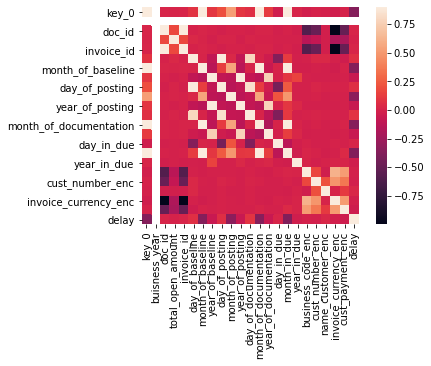

In [60]:
corrmat = x_train.merge(y_train , on = x_train.index).corr()
plt.subplotsxfigsize=(12,10)
sns.heatmap(corrmat, vmax=0.9, square=True)

In [61]:
x_train.dtypes

buisness_year               int64
doc_id                      int64
total_open_amount         float64
invoice_id                float64
day_of_baseline             int64
month_of_baseline           int64
year_of_baseline            int64
day_of_posting              int64
month_of_posting            int64
year_of_posting             int64
day_of_documentation        int64
month_of_documentation      int64
year_of_documentation       int64
day_in_due                  int64
month_in_due                int64
year_in_due                 int64
business_code_enc           int32
cust_number_enc             int32
name_customer_enc           int32
invoice_currency_enc        int32
cust_payment_enc            int32
dtype: object

# Linear Regression model

In [62]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [63]:
y_predict = lr.predict(x_val)

In [64]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_val, y_predict, squared=False)

120.78934526205626

In [65]:
Y_predict = lr.predict(x_test)

In [66]:
mean_squared_error(y_test, Y_predict, squared=False)

255.57046268425913

# Decision Tree Model

In [67]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0 , max_depth=5)

In [68]:
regressor.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [69]:
y_predict2 = regressor.predict(x_val)

In [70]:
mean_squared_error(y_val, y_predict2, squared=False)

86.53101439175428

In [71]:
Y_predict2 = regressor.predict(x_test)

In [72]:
mean_squared_error(y_test,Y_predict2,squared=False)

71.70815224299596

In [73]:
main_test

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200707822,PUBLI foundation,NaT,2020,1930751582,2020-05-04,2020-04-05,2020-04-20,USD,162682.15,2020-04-05,NAA8,1.930752e+09,1
16,U001,200769623,WAL-MAR llc,NaT,2020,1930847266,2020-07-05,2020-05-02,2020-05-22,USD,1300.53,2020-05-07,NAH4,1.930847e+09,1
18,U001,200769623,WAL-MAR us,NaT,2020,1930825972,2020-04-26,2020-04-25,2020-05-11,USD,48726.36,2020-04-26,NAH4,1.930826e+09,1
22,U001,200984655,PERFOR foundation,NaT,2020,1930825654,2020-04-29,2020-04-25,2020-05-14,USD,4170.15,2020-04-29,NAA8,1.930826e+09,1
24,U001,100036538,DENVER trust,NaT,2020,1930728079,2020-03-04,2020-04-01,2020-04-18,USD,2220.00,2020-04-03,NAA8,1.930728e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49978,U001,200769623,WAL-MAR us,NaT,2020,1930718080,2020-03-30,2020-03-29,2020-04-14,USD,449.42,2020-03-30,NAH4,1.930718e+09,1
49981,CA02,140105847,GORDON F foundation,NaT,2020,2960626597,2020-04-13,2020-04-13,2020-04-25,CAD,874.00,2020-04-15,CA10,2.960627e+09,1
49982,U013,140103470,D'ALB co,NaT,2020,1991841250,2020-03-23,2020-03-23,2020-04-22,USD,55569.15,2020-03-23,NAVE,1.991841e+09,1
49989,U001,200743996,STATER,NaT,2020,1930583902,2020-02-03,2020-02-29,2020-03-17,USD,61650.59,2020-03-02,NAA8,1.930584e+09,1


In [74]:
main_test.isna().sum()

business_code               0
cust_number                 0
name_customer               0
clear_date              10000
buisness_year               0
doc_id                      0
posting_date                0
document_create_date        0
due_in_date                 0
invoice_currency            0
total_open_amount           0
baseline_create_date        0
cust_payment_terms          0
invoice_id                  0
isOpen                      0
dtype: int64

In [75]:
x_main_test = main_test.drop(['clear_date'],axis=1)
x_main_test

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200707822,PUBLI foundation,2020,1930751582,2020-05-04,2020-04-05,2020-04-20,USD,162682.15,2020-04-05,NAA8,1.930752e+09,1
16,U001,200769623,WAL-MAR llc,2020,1930847266,2020-07-05,2020-05-02,2020-05-22,USD,1300.53,2020-05-07,NAH4,1.930847e+09,1
18,U001,200769623,WAL-MAR us,2020,1930825972,2020-04-26,2020-04-25,2020-05-11,USD,48726.36,2020-04-26,NAH4,1.930826e+09,1
22,U001,200984655,PERFOR foundation,2020,1930825654,2020-04-29,2020-04-25,2020-05-14,USD,4170.15,2020-04-29,NAA8,1.930826e+09,1
24,U001,100036538,DENVER trust,2020,1930728079,2020-03-04,2020-04-01,2020-04-18,USD,2220.00,2020-04-03,NAA8,1.930728e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49978,U001,200769623,WAL-MAR us,2020,1930718080,2020-03-30,2020-03-29,2020-04-14,USD,449.42,2020-03-30,NAH4,1.930718e+09,1
49981,CA02,140105847,GORDON F foundation,2020,2960626597,2020-04-13,2020-04-13,2020-04-25,CAD,874.00,2020-04-15,CA10,2.960627e+09,1
49982,U013,140103470,D'ALB co,2020,1991841250,2020-03-23,2020-03-23,2020-04-22,USD,55569.15,2020-03-23,NAVE,1.991841e+09,1
49989,U001,200743996,STATER,2020,1930583902,2020-02-03,2020-02-29,2020-03-17,USD,61650.59,2020-03-02,NAA8,1.930584e+09,1


In [76]:
main_test.drop(['clear_date'], inplace =True,axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [77]:
x_main_test['day_of_baseline'] = x_main_test['baseline_create_date'].dt.day
x_main_test['month_of_baseline'] = x_main_test['baseline_create_date'].dt.month
x_main_test['year_of_baseline'] = x_main_test['baseline_create_date'].dt.year

In [78]:
x_main_test['day_of_posting'] = x_main_test['posting_date'].dt.day
x_main_test['month_of_posting'] = x_main_test['posting_date'].dt.month
x_main_test['year_of_posting'] = x_main_test['posting_date'].dt.year

In [79]:
x_main_test['day_of_documentation'] = x_main_test['document_create_date'].dt.day
x_main_test['month_of_documentation'] = x_main_test['document_create_date'].dt.month
x_main_test['year_of_documentation'] = x_main_test['document_create_date'].dt.year

In [80]:
x_main_test['day_in_due'] = x_main_test['due_in_date'].dt.day
x_main_test['month_in_due'] = x_main_test['due_in_date'].dt.month
x_main_test['year_in_due'] = x_main_test['due_in_date'].dt.year

In [81]:
x_main_test['business_code_enc'] = le.fit_transform(x_main_test['business_code'])
x_main_test['cust_number_enc'] = le.fit_transform(x_main_test['cust_number'])
x_main_test['name_customer_enc'] = le.fit_transform(x_main_test['name_customer'])
x_main_test['invoice_currency_enc'] = le.fit_transform(x_main_test['invoice_currency'])
x_main_test['cust_payment_enc'] = le.fit_transform(x_main_test['cust_payment_terms'])

In [82]:
x_main_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 49999
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           10000 non-null  object        
 1   cust_number             10000 non-null  object        
 2   name_customer           10000 non-null  object        
 3   buisness_year           10000 non-null  int64         
 4   doc_id                  10000 non-null  int64         
 5   posting_date            10000 non-null  datetime64[ns]
 6   document_create_date    10000 non-null  datetime64[ns]
 7   due_in_date             10000 non-null  datetime64[ns]
 8   invoice_currency        10000 non-null  object        
 9   total_open_amount       10000 non-null  float64       
 10  baseline_create_date    10000 non-null  datetime64[ns]
 11  cust_payment_terms      10000 non-null  object        
 12  invoice_id              10000 non-null  float6

In [83]:
x_main_test.drop(['business_code','cust_number','name_customer','posting_date','document_create_date',
               'due_in_date','invoice_currency','baseline_create_date','cust_payment_terms'],inplace =True ,axis=1)

In [84]:
x_main_test.columns

Index(['buisness_year', 'doc_id', 'total_open_amount', 'invoice_id', 'isOpen',
       'day_of_baseline', 'month_of_baseline', 'year_of_baseline',
       'day_of_posting', 'month_of_posting', 'year_of_posting',
       'day_of_documentation', 'month_of_documentation',
       'year_of_documentation', 'day_in_due', 'month_in_due', 'year_in_due',
       'business_code_enc', 'cust_number_enc', 'name_customer_enc',
       'invoice_currency_enc', 'cust_payment_enc'],
      dtype='object')

In [85]:
x_train.columns

Index(['buisness_year', 'doc_id', 'total_open_amount', 'invoice_id',
       'day_of_baseline', 'month_of_baseline', 'year_of_baseline',
       'day_of_posting', 'month_of_posting', 'year_of_posting',
       'day_of_documentation', 'month_of_documentation',
       'year_of_documentation', 'day_in_due', 'month_in_due', 'year_in_due',
       'business_code_enc', 'cust_number_enc', 'name_customer_enc',
       'invoice_currency_enc', 'cust_payment_enc'],
      dtype='object')

In [86]:
x_main_test.drop(['isOpen'],inplace =True ,axis=1)

In [87]:
final = regressor.predict(x_main_test)

In [88]:
final = pd.Series(final,name='delay')

In [89]:
main_test.reset_index(drop=True,inplace=True)

In [90]:
Final = main_test.merge(final , on = x_main_test.index )
Final

,key_0,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
0,0,U001,200707822,PUBLI foundation,2020,1930751582,2020-05-04,2020-04-05,2020-04-20,USD,162682.15,2020-04-05,NAA8,1.930752e+09,1,3.931983
1,16,U001,200769623,WAL-MAR llc,2020,1930847266,2020-07-05,2020-05-02,2020-05-22,USD,1300.53,2020-05-07,NAH4,1.930847e+09,1,3.931983
2,18,U001,200769623,WAL-MAR us,2020,1930825972,2020-04-26,2020-04-25,2020-05-11,USD,48726.36,2020-04-26,NAH4,1.930826e+09,1,51.488948
3,22,U001,200984655,PERFOR foundation,2020,1930825654,2020-04-29,2020-04-25,2020-05-14,USD,4170.15,2020-04-29,NAA8,1.930826e+09,1,51.488948
4,24,U001,100036538,DENVER trust,2020,1930728079,2020-03-04,2020-04-01,2020-04-18,USD,2220.00,2020-04-03,NAA8,1.930728e+09,1,3.931983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,49978,U001,200769623,WAL-MAR us,2020,1930718080,2020-03-30,2020-03-29,2020-04-14,USD,449.42,2020-03-30,NAH4,1.930718e+09,1,28.484194
9996,49981,CA02,140105847,GORDON F foundation,2020,2960626597,2020-04-13,2020-04-13,2020-04-25,CAD,874.00,2020-04-15,CA10,2.960627e+09,1,-23.809524
9997,49982,U013,140103470,D'ALB co,2020,1991841250,2020-03-23,2020-03-23,2020-04-22,USD,55569.15,2020-03-23,NAVE,1.991841e+09,1,28.484194
9998,49989,U001,200743996,STATER,2020,1930583902,2020-02-03,2020-02-29,2020-03-17,USD,61650.59,2020-03-02,NAA8,1.930584e+09,1,2.383113


In [91]:
Final.dtypes

key_0                            int64
business_code                   object
cust_number                     object
name_customer                   object
buisness_year                    int64
doc_id                           int64
posting_date            datetime64[ns]
document_create_date    datetime64[ns]
due_in_date             datetime64[ns]
invoice_currency                object
total_open_amount              float64
baseline_create_date    datetime64[ns]
cust_payment_terms              object
invoice_id                     float64
isOpen                           int64
delay                          float64
dtype: object

In [92]:
Final['delay']=Final['delay'].round()

In [93]:
Final['delay']=pd.to_timedelta(Final['delay'],unit='D')

In [94]:
from datetime import timedelta

In [95]:
Final['predicted_payment_date'] = Final['due_in_date']+Final['delay']

In [96]:
Final

,key_0,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay,predicted_payment_date
0,0,U001,200707822,PUBLI foundation,2020,1930751582,2020-05-04,2020-04-05,2020-04-20,USD,162682.15,2020-04-05,NAA8,1.930752e+09,1,4 days,2020-04-24
1,16,U001,200769623,WAL-MAR llc,2020,1930847266,2020-07-05,2020-05-02,2020-05-22,USD,1300.53,2020-05-07,NAH4,1.930847e+09,1,4 days,2020-05-26
2,18,U001,200769623,WAL-MAR us,2020,1930825972,2020-04-26,2020-04-25,2020-05-11,USD,48726.36,2020-04-26,NAH4,1.930826e+09,1,51 days,2020-07-01
3,22,U001,200984655,PERFOR foundation,2020,1930825654,2020-04-29,2020-04-25,2020-05-14,USD,4170.15,2020-04-29,NAA8,1.930826e+09,1,51 days,2020-07-04
4,24,U001,100036538,DENVER trust,2020,1930728079,2020-03-04,2020-04-01,2020-04-18,USD,2220.00,2020-04-03,NAA8,1.930728e+09,1,4 days,2020-04-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,49978,U001,200769623,WAL-MAR us,2020,1930718080,2020-03-30,2020-03-29,2020-04-14,USD,449.42,2020-03-30,NAH4,1.930718e+09,1,28 days,2020-05-12
9996,49981,CA02,140105847,GORDON F foundation,2020,2960626597,2020-04-13,2020-04-13,2020-04-25,CAD,874.00,2020-04-15,CA10,2.960627e+09,1,-24 days,2020-04-01
9997,49982,U013,140103470,D'ALB co,2020,1991841250,2020-03-23,2020-03-23,2020-04-22,USD,55569.15,2020-03-23,NAVE,1.991841e+09,1,28 days,2020-05-20
9998,49989,U001,200743996,STATER,2020,1930583902,2020-02-03,2020-02-29,2020-03-17,USD,61650.59,2020-03-02,NAA8,1.930584e+09,1,2 days,2020-03-19


In [97]:
Final.dtypes

key_0                               int64
business_code                      object
cust_number                        object
name_customer                      object
buisness_year                       int64
doc_id                              int64
posting_date               datetime64[ns]
document_create_date       datetime64[ns]
due_in_date                datetime64[ns]
invoice_currency                   object
total_open_amount                 float64
baseline_create_date       datetime64[ns]
cust_payment_terms                 object
invoice_id                        float64
isOpen                              int64
delay                     timedelta64[ns]
predicted_payment_date     datetime64[ns]
dtype: object

In [98]:
bucket=[0,15,16,30,31,45]
Final['predicted_aging_bucket'] = np.searchsorted(bucket, Final['delay'].values)

In [99]:
Final

,key_0,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay,predicted_payment_date,predicted_aging_bucket
0,0,U001,200707822,PUBLI foundation,2020,1930751582,2020-05-04,2020-04-05,2020-04-20,USD,162682.15,2020-04-05,NAA8,1.930752e+09,1,4 days,2020-04-24,6
1,16,U001,200769623,WAL-MAR llc,2020,1930847266,2020-07-05,2020-05-02,2020-05-22,USD,1300.53,2020-05-07,NAH4,1.930847e+09,1,4 days,2020-05-26,6
2,18,U001,200769623,WAL-MAR us,2020,1930825972,2020-04-26,2020-04-25,2020-05-11,USD,48726.36,2020-04-26,NAH4,1.930826e+09,1,51 days,2020-07-01,6
3,22,U001,200984655,PERFOR foundation,2020,1930825654,2020-04-29,2020-04-25,2020-05-14,USD,4170.15,2020-04-29,NAA8,1.930826e+09,1,51 days,2020-07-04,6
4,24,U001,100036538,DENVER trust,2020,1930728079,2020-03-04,2020-04-01,2020-04-18,USD,2220.00,2020-04-03,NAA8,1.930728e+09,1,4 days,2020-04-22,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,49978,U001,200769623,WAL-MAR us,2020,1930718080,2020-03-30,2020-03-29,2020-04-14,USD,449.42,2020-03-30,NAH4,1.930718e+09,1,28 days,2020-05-12,6
9996,49981,CA02,140105847,GORDON F foundation,2020,2960626597,2020-04-13,2020-04-13,2020-04-25,CAD,874.00,2020-04-15,CA10,2.960627e+09,1,-24 days,2020-04-01,0
9997,49982,U013,140103470,D'ALB co,2020,1991841250,2020-03-23,2020-03-23,2020-04-22,USD,55569.15,2020-03-23,NAVE,1.991841e+09,1,28 days,2020-05-20,6
9998,49989,U001,200743996,STATER,2020,1930583902,2020-02-03,2020-02-29,2020-03-17,USD,61650.59,2020-03-02,NAA8,1.930584e+09,1,2 days,2020-03-19,6


In [100]:
Final.dtypes

key_0                               int64
business_code                      object
cust_number                        object
name_customer                      object
buisness_year                       int64
doc_id                              int64
posting_date               datetime64[ns]
document_create_date       datetime64[ns]
due_in_date                datetime64[ns]
invoice_currency                   object
total_open_amount                 float64
baseline_create_date       datetime64[ns]
cust_payment_terms                 object
invoice_id                        float64
isOpen                              int64
delay                     timedelta64[ns]
predicted_payment_date     datetime64[ns]
predicted_aging_bucket              int64
dtype: object